# 레진 데이터 챌린지 with 파이콘 한국 2017

http://tech.lezhin.com/events/data-challenge-pyconkr-2017

## 데이터 분석

In [1]:
ls -lrt lezhin_dataset_v2_training.tsv

-rw-r--r--  1 donglyeolsin  staff  239197437  8 13 12:06 lezhin_dataset_v2_training.tsv


9~15 번째 열이 정답 레이블인 0번째 열과 같은 값을 가지는지 확인해 보았습니다.

In [2]:
import pandas as pd

df = pd.read_table('lezhin_dataset_v2_training.tsv', header=None)
print(all(df[0] == df[[9, 10, 11, 12, 13, 14, 15]].any(axis=1)))

False


데이터 열끼리 상관관계를 다음처럼 히트맵으로 출력하였습니다.

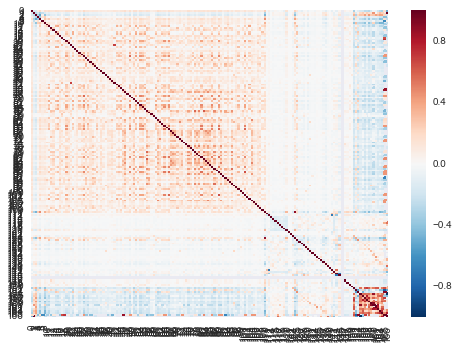

In [3]:
%matplotlib inline
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

데이터 열끼리 상관관계 값을 정렬하여 제일 높은 값을 출력하였습니다.

In [4]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
s = corr.unstack()
so = s.sort_values(kind="quicksort")
so = so.dropna()
# https://stackoverflow.com/questions/18624039/pandas-reset-index-on-series-to-remove-multiindex
so = so.reset_index()
so[so['level_0']!=so['level_1']].tail(10)

,level_0,level_1,0
25696,154,160,0.860670
25697,160,154,0.860670
25698,124,110,0.883358
25699,110,124,0.883358
25700,159,160,0.901885
25701,160,159,0.901885
25702,165,153,0.918212
25703,153,165,0.918212
25704,166,1,0.986777
25705,1,166,0.986777


정답레이블과 다른 열과의 상관관계 값을 정렬하여 제일 높은 값을 출력하였습니다.
가장 높은 값이 0.240389가 나왔습니다.

In [5]:
so[so['level_0']==0].tail(10)

,level_0,level_1,0
23015,0,50,0.170594
23087,0,46,0.173585
23153,0,11,0.175697
23176,0,165,0.176384
23451,0,61,0.186519
23722,0,4,0.199042
23767,0,27,0.201936
24134,0,124,0.222300
24381,0,110,0.240389
25708,0,0,1.000000


In [6]:
print("전체 데이터 컬럼 개수 : %d" % len(df.columns))

전체 데이터 컬럼 개수 : 167


In [7]:
print("전체 데이터 개수 : %d" % len(df))

전체 데이터 개수 : 650965


학습에 사용할 데이터를 다음처럼 추출하였습니다.

In [8]:
df_1 = df.drop(df.columns[[6,7,]], axis=1)
df_1 = df_1.dropna(axis=1)
df_1

,0,1,2,3,4,5,8,10,11,12,...,141,142,143,144,145,146,147,148,149,150
0,0,0,0,0,1,1,1,0,11,0,...,19,1,19,1,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,...,19,1,19,1,0,0,0,0,0,0
2,0,0,0,0,1,1,1,0,1,0,...,19,1,19,1,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,34,0,...,19,1,19,1,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,19,0,18,1,0,0,0,0,0,0
5,0,0,0,0,1,1,1,3,2,0,...,19,0,18,1,0,0,0,0,0,0
6,0,0,0,0,1,1,1,5,2,0,...,19,0,15,4,0,0,0,0,0,0
7,0,0,0,0,1,1,0,0,0,0,...,19,0,15,4,0,0,0,0,0,0
8,0,0,0,0,1,1,1,0,0,0,...,19,0,15,4,0,0,0,0,0,0
9,0,0,0,0,1,1,1,0,5,0,...,19,0,15,4,0,0,0,0,0,0


In [9]:
print("학습할 데이터 컬럼 개수 : %d" % len(df_1.columns)) # 데이터 컬럼 개수
print("학습할 데이터 개수 : %d" % len(df_1)) # 데이터 개수

학습할 데이터 컬럼 개수 : 148
학습할 데이터 개수 : 650965


다음 페이지에서 '모델 학습 및 평가' 과정을 진행합니다.

http://nbviewer.jupyter.org/github/SDRLurker/lezhin/blob/master/%EB%AA%A8%EB%8D%B8%20%ED%95%99%EC%8A%B5%20%EB%B0%8F%20%ED%8F%89%EA%B0%80.ipynb